<a href="https://colab.research.google.com/github/1772hojaz/Water_Quality_Model/blob/main/Eunice_Adewusi_Water_Potability_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!kaggle datasets download -d uom190346a/water-quality-and-potability

Dataset URL: https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability
License(s): apache-2.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 53.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('water-quality-and-potability.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [109]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# **Data Loading**

In [5]:
#LOAD THE DATA

path = "/content/water_potability.csv"
df = pd.read_csv(path)

# Print some part of the dataset
df.head(11)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


Inspect and Display basic information about the dataset

In [6]:
df.shape

(3276, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
# Display just the sum of nullable rows in each column + Check for missing values
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# **Data Preprocesing**

In [10]:
# Fill the NaN values with the mean of the column
df.fillna(df.mean(numeric_only=True), inplace=True)

In [11]:
# Verify that no missing values remain
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [12]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


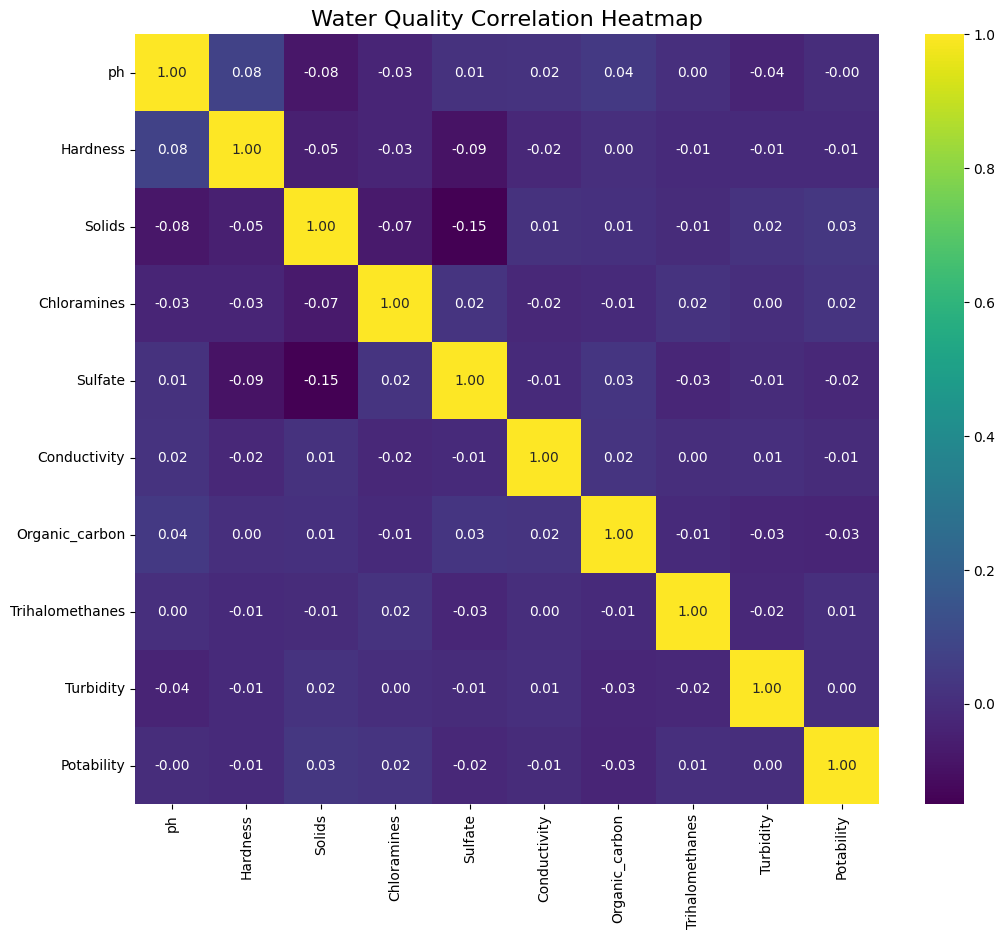

In [13]:
# Create a correlation matrix to look for multicollinearity between features
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')

# Adding a title for the heatmap
plt.title('Water Quality Correlation Heatmap', fontsize=16)
plt.show()

**Analyzing Class Distribution in the Potability Dataset**

In [14]:
# Count the occurrences of each class (0: Non-potable, 1: Potable) in the 'Potability' column
zero, one = np.bincount(df['Potability'])

# Compute the total number of samples
total = zero + one

# Print the total count and percentage distribution of each class
print("Examples:\n  Total: {}\n  zero: {} ({:.2f}% of total)\n  one: {} ({:.2f}% of total)".format(
    total, zero, 100 * zero / total, one, 100 * one / total))

Examples:
  Total: 3276
  zero: 1998 (60.99% of total)
  one: 1278 (39.01% of total)


# **Feature Engineering and Data Splitting**
Splitting into 70% train, 15% validation, 15% test

In [15]:
# Define features (X) and target (Y)
X = df.drop(columns=['Potability'])
Y = df['Potability']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training (70%) and remaining (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, Y, test_size=0.30, random_state=42)

# Split remaining data into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Convert labels to numpy arrays
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (2293, 9)
Validation set size: (491, 9)
Test set size: (492, 9)


Dropped the Potability column because it is the variable we want to predict: potable (1) or non-potable (0). Keeping it in the feature matrix would lead to data leakage, where the model learns from the answer instead of identifying patterns in the actual features.

- `test_size=0.30` means that 30% of the data will be allocated to the test set, and the remaining 70% will be allocated to the training set.
- `test_size=0.50` means that half of `X_temp` goes to validation and the other half to testing.

# **Model Architecture - L2 Regularized Model with SGD (Stochastic Gradient Descent) Optimizer**

- Architecture: 4 hidden layers with units [64, 128, 256, 512]
- Hidden Layer Activation: RELU
- Output Layer Activation: Sigmoid
- Dropout Rate: 0.4, 0.5, 0.5, 0.6
- Learning Rate: 1e-4
- Optimizer: SGD (Stochastic Gradient Descent) with momentum
- Loss: Mean Squared Error (MSE)
- Early Stopping: Patience of 5 epochs

In [92]:
# Build the Neural Network Model
model = Sequential()

# Input Layer
input_dim = X_train.shape[1]
model.add(Input(shape=(input_dim,)))

# Hidden Layers with Reduced Regularization
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.0001)))  # Reduced L2
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))  # Dropout rate kept at 20%

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with SGD and Learning Rate Adjustments
model.compile(optimizer=SGD(learning_rate=0.007, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks: Early Stopping + Learning Rate Decay
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Normalize Inputs (Important for SGD)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Model Summary
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_131 (Dense)                    │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation of Choices:**

1. Learning Rate (`learning_rate=0.01`):

- I chose 0.01 for the SGD learning rate. SGD typically requires a smaller learning rate than Adam, as it doesn't adapt during training. This value strikes a balance between too slow convergence and overshooting the minima. It's a starting point; you can experiment with smaller values (like 0.001) or larger ones depending on the training behavior.
- Momentum (`momentum=0.9`): This helps SGD converge faster by using past gradients to update the current gradient, speeding up training.

2. Dropout Rate (`Dropout(0.4)`):

- I've set the dropout rate to 40% in the hidden layers. Dropout works by randomly turning off neurons during training to prevent the model from overfitting. A higher dropout rate (like 50%) can be used for more complex models, but a 40% rate is a balanced choice for preventing overfitting without losing too much information during training.
- It's important to experiment with dropout rates to find the best balance between training performance and overfitting prevention.

3. Early Stopping:

- Patience: I've set patience=5, which means training will stop if the validation loss does not improve for 5 consecutive epochs. This helps prevent overfitting by stopping training at the right moment when the model starts to memorize the data.
- Restore Best Weights: This option ensures that if the model's performance degrades after stopping, it will revert to the best model weights observed during training.

4. L2 Regularization (`kernel_regularizer=l2(0.01)`):

- I added L2 regularization with a factor of 0.01 to each dense layer. This penalizes large weights and helps improve generalization by preventing the model from fitting too closely to the training data. This can be adjusted based on model performance.

# Start the training Process

In [93]:
# Train the model with increased batch size
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
          callbacks=[early_stopping, reduce_lr])

# Get the history details
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history.get('acc', history.history.get('accuracy'))
val_accuracy = history.history.get('val_acc', history.history.get('val_accuracy'))

# Print final epoch number
print(f"Training stopped at epoch: {len(train_loss)}")

# Print final training and validation accuracy/loss
print(f"Final Training Accuracy: {train_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy[-1]:.4f}")
print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5612 - loss: 0.6878 - val_accuracy: 0.6314 - val_loss: 0.6643 - learning_rate: 0.0070
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6063 - loss: 0.6776 - val_accuracy: 0.6354 - val_loss: 0.6549 - learning_rate: 0.0070
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6358 - loss: 0.6509 - val_accuracy: 0.6375 - val_loss: 0.6534 - learning_rate: 0.0070
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6318 - loss: 0.6518 - val_accuracy: 0.6456 - val_loss: 0.6383 - learning_rate: 0.0070
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6381 - loss: 0.6418 - val_accuracy: 0.6395 - val_loss: 0.6304 - learning_rate: 0.0070
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6478 - loss: 0.6367 - val_accuracy: 0.6578 - val_loss: 0.6194 - learning_rate: 0.0070
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: 0.6295 - val_ac

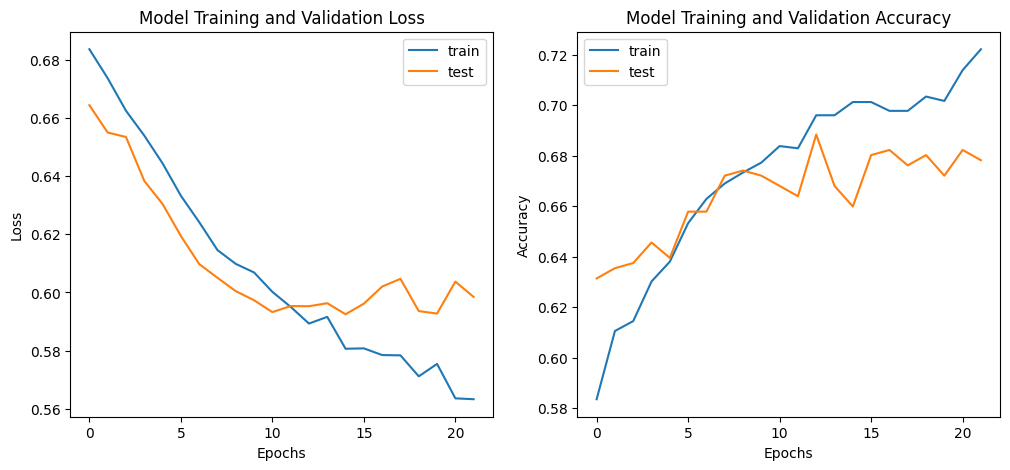

In [94]:
# Plotting the training and validation loss and accuracy
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Training and Validation Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Training and Validation Accuracy')
    plt.legend()

    plt.show()

# Plot the graphs
plot_history(history)

# **Model Evaluation**

By comparing the predicted labels with the actual labels, the confusion matrix provided insights into the number of true positives, true negatives, false positives, and false negatives. I also generated a classification report that included precision, recall, and F1-scores for both classes (Unsafe and Safe).

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
               precision    recall  f1-score   support

      Unsafe       0.62      0.18      0.27       307
        Safe       0.38      0.82      0.52       185

    accuracy                           0.42       492
   macro avg       0.50      0.50      0.39       492
weighted avg       0.53      0.42      0.36       492


Precision for Unsafe: 0.62
Recall for Unsafe: 0.18
F1-score for Unsafe: 0.27

Precision for Safe: 0.38
Recall for Safe: 0.82
F1-score for Safe: 0.52

General F1 Score: 0.3947
General Precision: 0.4980
General Recall: 0.4988


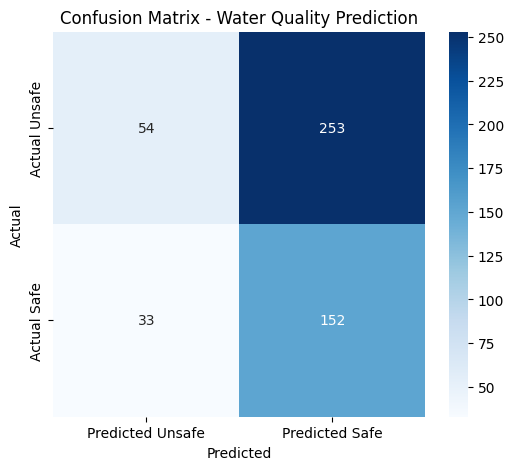

In [113]:
# Predict classes on the test set
y_pred = (model.predict(X_test) > 0.3).astype("int32")

# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Unsafe', 'Safe'])

# Print out the classification report
print("Classification Report:\n", report)

# Extract precision, recall, and f1-score from the report for both classes
precision_unsafe = precision_score(y_test, y_pred, pos_label=0)
recall_unsafe = recall_score(y_test, y_pred, pos_label=0)
f1_unsafe = f1_score(y_test, y_pred, pos_label=0)

precision_safe = precision_score(y_test, y_pred, pos_label=1)
recall_safe = recall_score(y_test, y_pred, pos_label=1)
f1_safe = f1_score(y_test, y_pred, pos_label=1)

# Print precision, recall, and F1-score for each class
print(f"\nPrecision for Unsafe: {precision_unsafe:.2f}")
print(f"Recall for Unsafe: {recall_unsafe:.2f}")
print(f"F1-score for Unsafe: {f1_unsafe:.2f}")

print(f"\nPrecision for Safe: {precision_safe:.2f}")
print(f"Recall for Safe: {recall_safe:.2f}")
print(f"F1-score for Safe: {f1_safe:.2f}")

# Calculate general (macro average) values for precision, recall, and f1-score
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

# Print the general (macro average) values
print(f"\nGeneral F1 Score: {f1_macro:.4f}")
print(f"General Precision: {precision_macro:.4f}")
print(f"General Recall: {recall_macro:.4f}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Unsafe', 'Predicted Safe'],
            yticklabels=['Actual Unsafe', 'Actual Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Water Quality Prediction')
plt.show()